# Análisis de los procesos migratorios 2000 - 2019

### PROYECTO TECNOLÓGICO INTEGRADOR ISPC

Integrantes:

* Joaquín Torres
* Leonardo Mansilla
* Daiana Senese

#### Fuente: https://datosmacro.expansion.com/demografia/migracion/inmigracion?anio=2017

##### La inmigración se define como el cambio de residencia habitual de una persona de un territorio (país) a otro por un periodo que se espera sea al menos de 12 meses. Así pues, cuando hablamos de inmigración e inmigrantes, nos referimos a las personas que entran en un país y nacieron o proceden de otro.

In [62]:
# se importan las librerias necesarias 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use('bmh')

In [63]:
df_complete = pd.read_csv(r'/scraping_proyecto_integrador/TSSSM5/csv_2000_to_2019.csv')

## Se realizan distintas operaciones para visualizar la composición del dataframe

In [64]:
df_complete.shape

(1168, 8)

In [66]:
df_complete.head(3)

,Unnamed: 0,Países,Inmigrantes hombres,Inmigrantes mujeres,Inmigrantes,% Inmigrantes,Var.,year
0,0,España,838.058,819.227,1.657.285,"4,08%","1,52",2000
1,1,Alemania,4.503.666,4.488.965,8.992.631,"10,93%","1,81",2000
2,2,Reino Unido,2.228.628,2.501.537,4.730.165,"8,02%","0,87",2000


In [67]:
df_complete.columns

Index(['Unnamed: 0', 'Países', 'Inmigrantes hombres', 'Inmigrantes mujeres',
       'Inmigrantes', '% Inmigrantes', 'Var.', 'year'],
      dtype='object')

In [68]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1168 non-null   int64 
 1   Países               1168 non-null   object
 2   Inmigrantes hombres  1168 non-null   object
 3   Inmigrantes mujeres  1168 non-null   object
 4   Inmigrantes          1168 non-null   object
 5   % Inmigrantes        1168 non-null   object
 6   Var.                 1167 non-null   object
 7   year                 1168 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 73.1+ KB


### Se realizan procedimientos para modificar el tipo de datos que contiene el data frame.

In [69]:
Inmigrants_total = []
for h in range(len(df_complete["Inmigrantes"])):
    Inmigrants_total.append(int(df_complete["Inmigrantes"][h].replace('.', '')))


Inmigrants_m_total = []
for h in range(len(df_complete["Inmigrantes mujeres"])):
    Inmigrants_m_total.append(int(df_complete["Inmigrantes mujeres"][h].replace('.', '')))

Inmigrants_h_total = []
for h in range(len(df_complete["Inmigrantes hombres"])):
    Inmigrants_h_total.append(int(df_complete["Inmigrantes hombres"][h].replace('.', '')))


df_complete["Inmigrantes_total"] = Inmigrants_total
df_complete["Inmigrantes_hombres"] = Inmigrants_m_total
df_complete["Inmigrantes_mujeres"] = Inmigrants_h_total

df_complete = df_complete.drop(['Inmigrantes hombres','Inmigrantes mujeres', 'Inmigrantes'], axis=1)


In [70]:
## Mostramos la estructura de la tabla
df_complete.head(10)

,Unnamed: 0,Países,% Inmigrantes,Var.,year,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres
0,0,España,"4,08%","1,52",2000,1657285,819227,838058
1,1,Alemania,"10,93%","1,81",2000,8992631,4488965,4503666
2,2,Reino Unido,"8,02%","0,87",2000,4730165,2501537,2228628
3,3,Francia,"10,30%","0,07",2000,6278718,3185929,3092789
4,4,Italia,"3,72%","0,60",2000,2121688,1144997,976691
5,5,Portugal,"6,31%","1,00",2000,651472,331153,320319
6,6,Estados Unidos,"12,34%","1,66",2000,34814053,17503268,17310785
7,7,Japón,"1,33%","0,24",2000,1686444,889516,796928
8,8,China,"0,04%",0,2000,508034,253952,254082
9,9,Andorra,"64,01%","-5,21",2000,42147,20054,22093


### Serie de tiempo: total de inmigrantes por año. 

In [91]:
cant_year = df_complete.groupby(["year"]).sum('Inmigrantes_total')

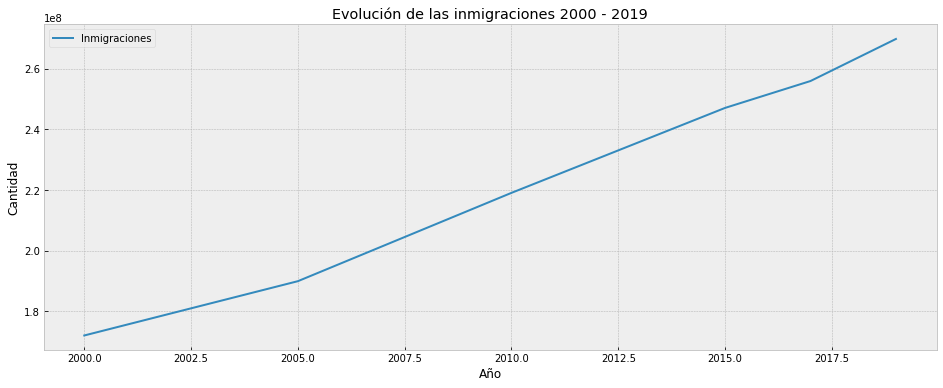

In [92]:
year_index = cant_year.index

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(year_index, cant_year["Inmigrantes_total"], label='Inmigraciones')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de las inmigraciones 2000 - 2019')
ax.legend() 

## Nos enfocamos en el año 2019

In [93]:
## Se crea un dataframe con los registros pertenecientes al año 2019
df_2019 = df_complete[df_complete['year'] == 2019]


### Generamos un gráfico que muetre los 10 paises con mas inmigración en el año 2019.

Text(0.5, 0, 'Total en millones')

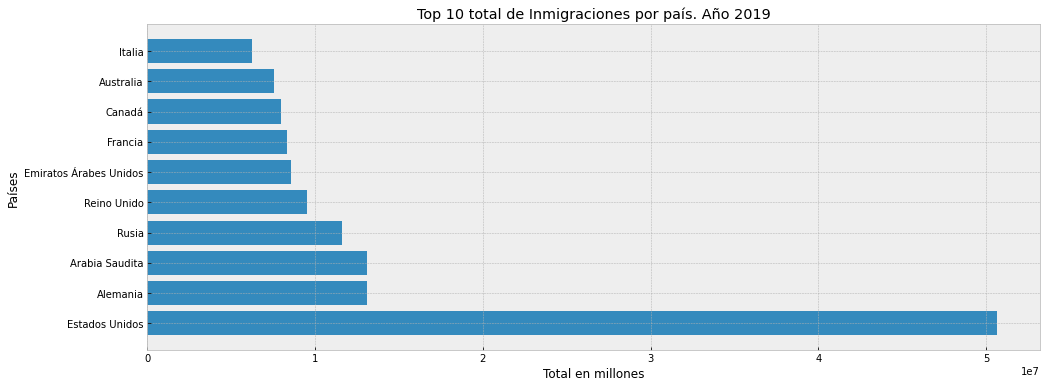

In [94]:

df_2019 = df_2019.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2019 = df_2019.head(10)

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2019['Países'], top_10_df_2019['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país. Año 2019')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')